Importamos las librerias necesarias

In [252]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn import preprocessing

Cargamos los datos para entrenamiento y los datos a predecir

In [253]:
data = pd.read_excel('E-Commerce_train.xlsx')
test = pd.read_excel('E-Commerce_test.xlsx')

In [210]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8999 entries, 0 to 8998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   8999 non-null   int64 
 1   Warehouse_block      8999 non-null   object
 2   Mode_of_Shipment     8999 non-null   object
 3   Customer_care_calls  8999 non-null   int64 
 4   Customer_rating      8999 non-null   int64 
 5   Cost_of_the_Product  8999 non-null   int64 
 6   Prior_purchases      8999 non-null   int64 
 7   Product_importance   8999 non-null   object
 8   Gender               8999 non-null   object
 9   Discount_offered     8999 non-null   int64 
 10  Weight_in_gms        8999 non-null   int64 
 11  Reached.on.Time_Y.N  8999 non-null   int64 
dtypes: int64(8), object(4)
memory usage: 843.8+ KB


In [211]:
data.describe()

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,8999.00000,8999.000000,8999.000000,8999.000000,8999.000000,8999.000000,8999.000000,8999.000000
mean,4500.00000,4.015113,2.994999,208.561507,3.511501,15.097678,3584.364596,0.635515
std,2597.93187,1.138934,1.413143,48.289172,1.532074,17.400040,1614.750194,0.481312
min,1.00000,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,2250.50000,3.000000,2.000000,168.000000,3.000000,4.000000,1857.000000,0.000000
50%,4500.00000,4.000000,3.000000,211.000000,3.000000,8.000000,4046.000000,1.000000
75%,6749.50000,5.000000,4.000000,249.500000,4.000000,19.000000,4999.500000,1.000000
max,8999.00000,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000


Vemos como se distribuyen las variables 

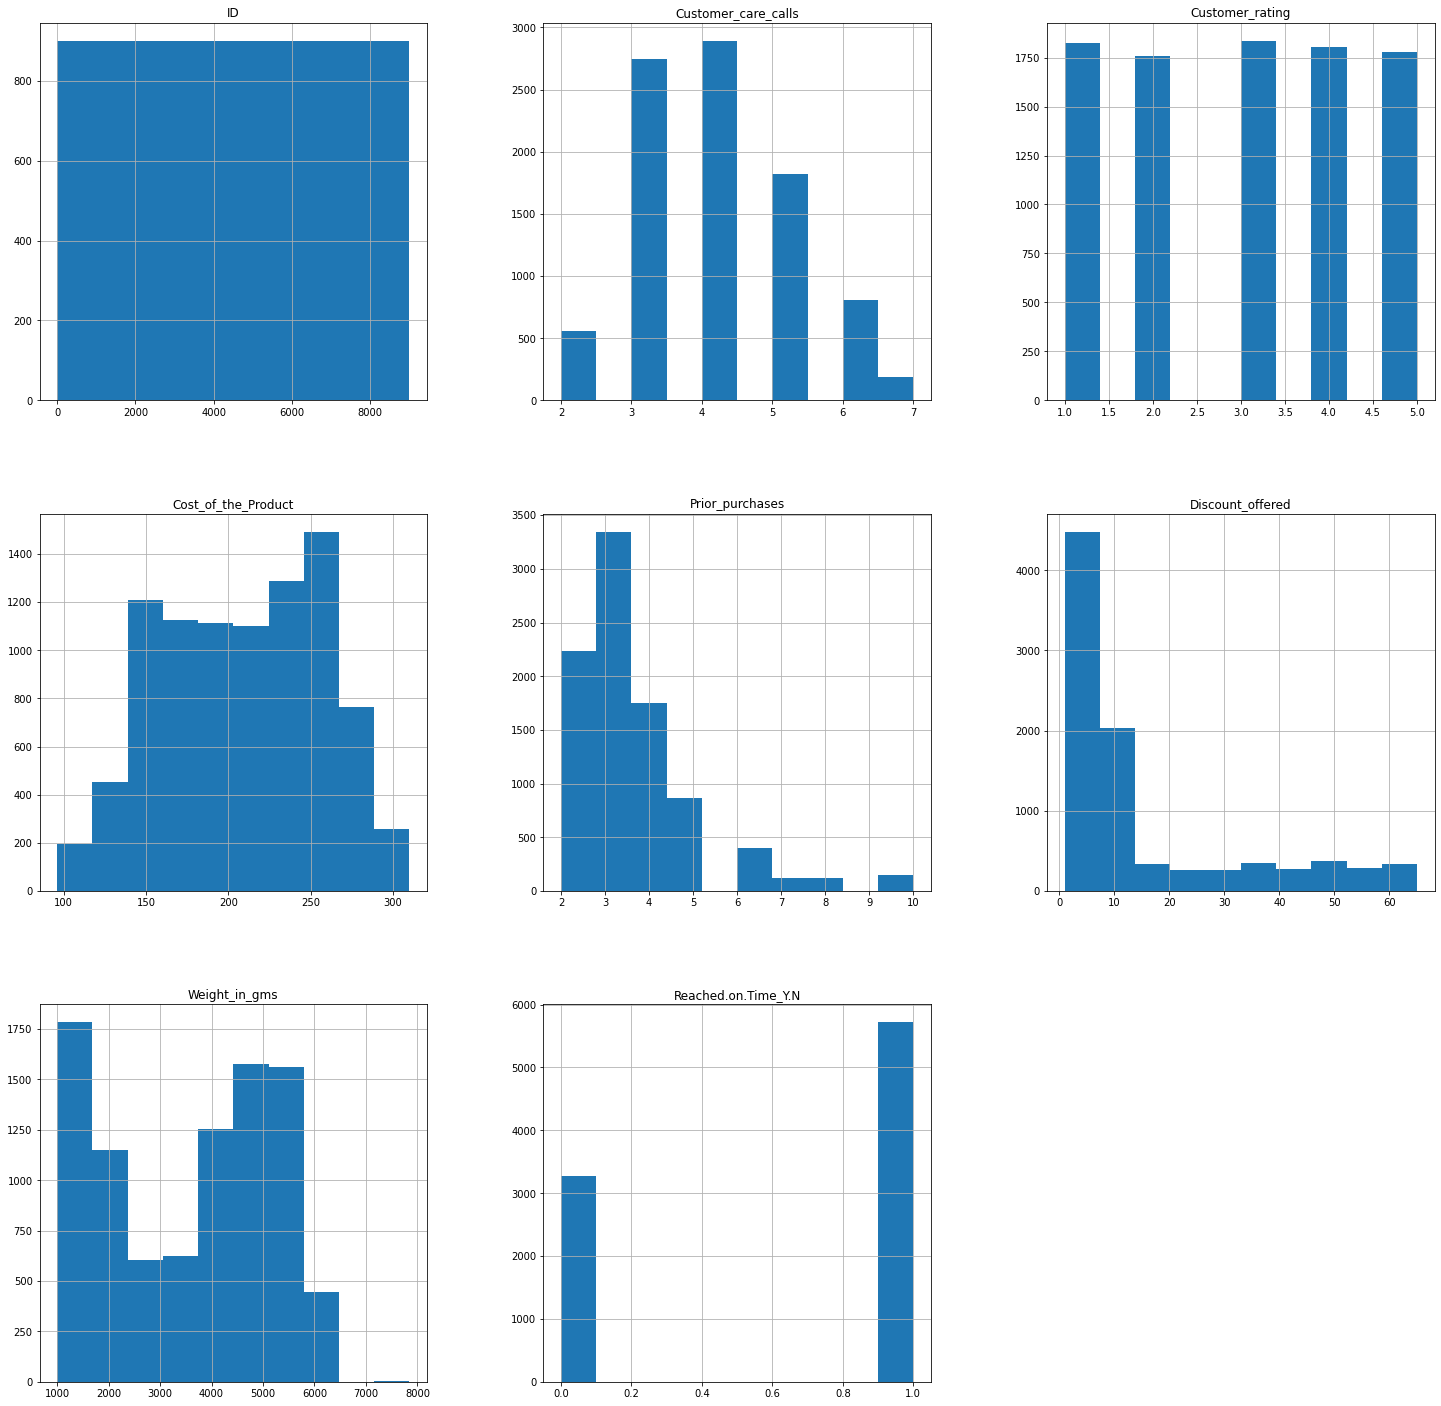

<Figure size 1800x1800 with 0 Axes>

In [212]:
data.hist(figsize=(25,25))
plt.figure(figsize=(25,25))
plt.show()

Luego de analizar el dataFrame. Procedemos a eliminar la columna ID y Gender ya que no se considera importante para la prediccion de mi modelo.

In [213]:
data.drop(columns=['ID', 'Gender'], inplace= True)

Analizamos la variable objetivo

In [214]:
data['Reached.on.Time_Y.N'].value_counts()


1    5719
0    3280
Name: Reached.on.Time_Y.N, dtype: int64

Reducimos dimensionalidad, uniendo el valor del producto con el descuento.

In [254]:
data = data.assign(cost_total=data.Cost_of_the_Product - data.Discount_offered*data.Cost_of_the_Product/100)
data.drop(columns=['Cost_of_the_Product','Discount_offered'], inplace=True)

Corroboramos si tenemos duplicados

In [216]:
data[data.duplicated()]

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Prior_purchases,Product_importance,Weight_in_gms,Reached.on.Time_Y.N,cost_total


Vemos si existen outliers

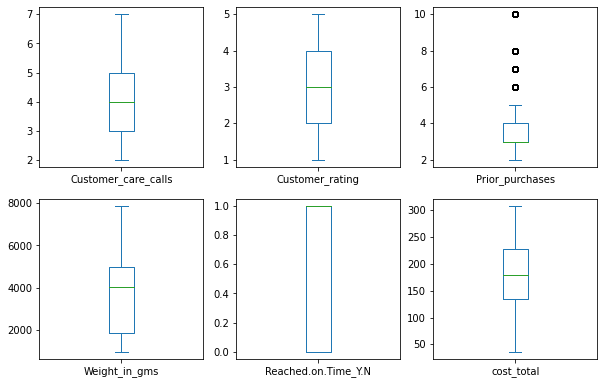

<Figure size 1080x1080 with 0 Axes>

In [217]:
data.plot(kind='box',subplots=True,layout= (3,3) , sharex=False, sharey=False,figsize=(10,10))
plt.figure(figsize=(15,15))
plt.show()

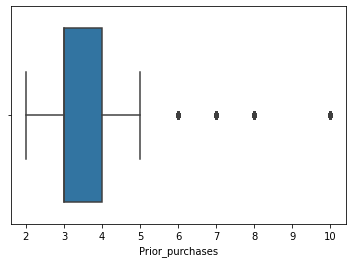

In [218]:
sns.boxplot(x = 'Prior_purchases', data = data)
plt.show()

Se puede observar que en Prior_purchases existen valores que no se encuentran dentro del rango, pero no los considero outliers. 

Podemos observar que en Customer_care_calls y cost_total se asemeja a una distribucion normal, por lo que se podria estandarizar.

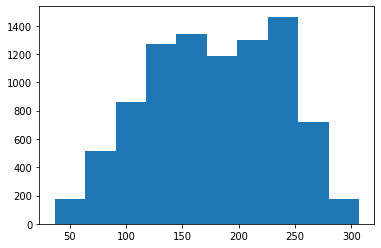

In [255]:
from sklearn.preprocessing import StandardScaler
plt.hist(data['cost_total'])
plt.show()


In [256]:
scaler = StandardScaler()
scaler.fit(data[['cost_total']])
data['cost_total'] = scaler.transform(data[['cost_total']])

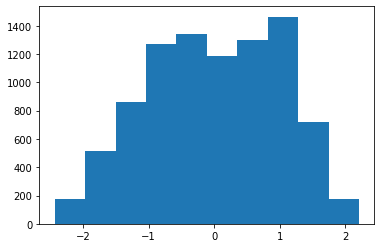

In [221]:
plt.hist(data['cost_total']) 
plt.show()

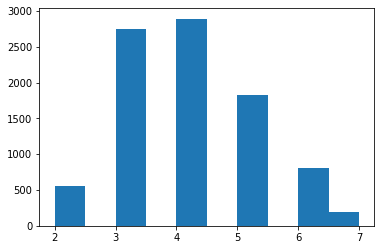

In [222]:
plt.hist(data['Customer_care_calls'])
plt.show()

In [223]:
scaler = StandardScaler()
scaler.fit(data[['Customer_care_calls']])
data['Customer_care_calls'] = scaler.transform(data[['Customer_care_calls']])

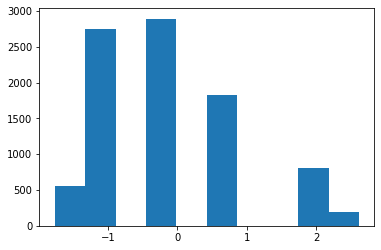

In [224]:
plt.hist(data['Customer_care_calls'])
plt.show()

Codificamos las variables categoricas 

In [257]:
data.Warehouse_block.unique()
label_encoder = preprocessing.LabelEncoder()
data['Warehouse_block'] = label_encoder.fit_transform(data['Warehouse_block'])

In [258]:
data.Mode_of_Shipment.unique()
data.Mode_of_Shipment.value_counts()
from sklearn.preprocessing import OneHotEncoder
data_encoded = data[['Mode_of_Shipment']]
ohe = OneHotEncoder(handle_unknown = 'ignore')
data_encoded = pd.DataFrame(ohe.fit_transform(data_encoded).toarray())
data = data.join(data_encoded)
data = data.rename(columns={0:'Flight',1:'Ship',2:'Road'})
data.drop(columns=['Mode_of_Shipment'], inplace=True)

In [259]:
data.Product_importance.unique()
label_encoder = preprocessing.LabelEncoder()
data['Product_importance'] = label_encoder.fit_transform(data['Product_importance'])

In [228]:
data

,Warehouse_block,Customer_care_calls,Customer_rating,Prior_purchases,Product_importance,Weight_in_gms,Reached.on.Time_Y.N,cost_total,Flight,Ship,Road
0,3,-0.013270,2,3,1,1233,1,-1.358916,1.0,0.0,0.0
1,4,-0.013270,5,2,1,3088,1,-1.540299,1.0,0.0,0.0
2,0,-1.769395,2,4,1,3374,1,-1.426934,1.0,0.0,0.0
3,1,-0.891333,3,4,2,1177,1,-0.340697,1.0,0.0,0.0
4,2,-1.769395,2,3,2,2484,1,-1.354793,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
8994,3,-0.891333,1,3,1,4177,1,0.628569,0.0,0.0,1.0
8995,4,0.864793,3,3,2,4526,0,0.803941,0.0,0.0,1.0
8996,0,-0.013270,5,3,2,4221,0,1.136477,0.0,0.0,1.0
8997,1,-0.013270,2,3,2,5931,1,-0.059003,0.0,0.0,1.0


Observamos las correlaciones que existen entre las variables

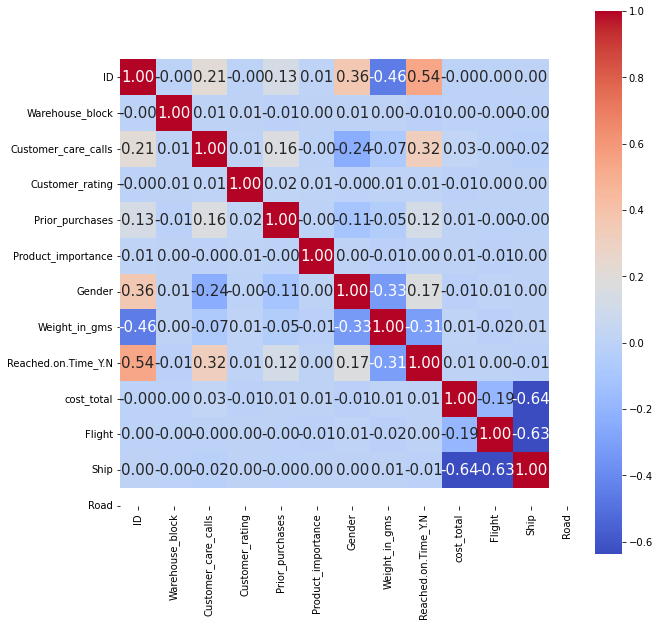

In [260]:
corr = data.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           xticklabels= data.columns, 
           yticklabels= data.columns,
           cmap= 'coolwarm')
plt.show()

In [230]:
import missingno as msno

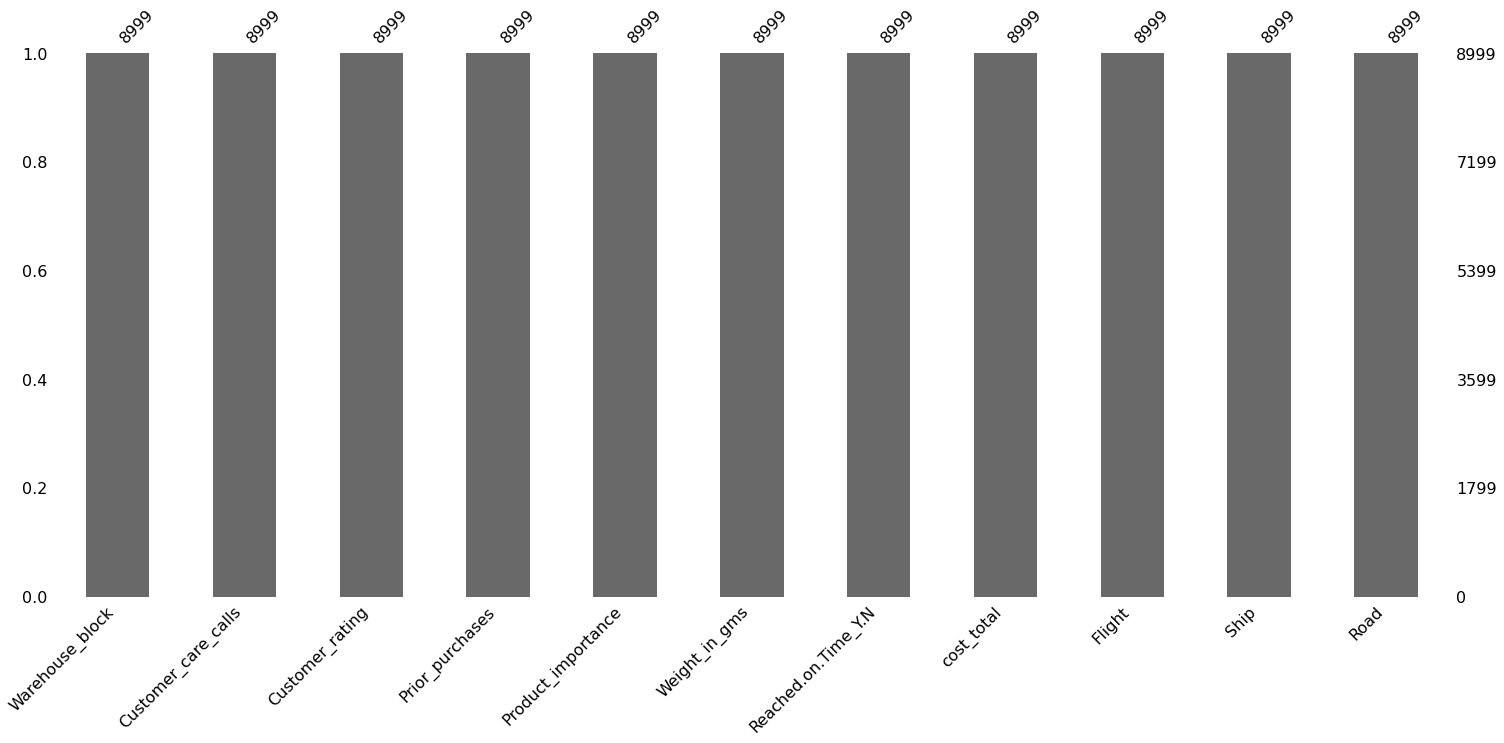

In [231]:
msno.bar(data)
plt.show()

No tiene Valores nulos

Con PairPlot obtendremos las relaciones entre las variables del dataframe, para poder seleccionar las mejores variables predictoras de nuestro modelo. 

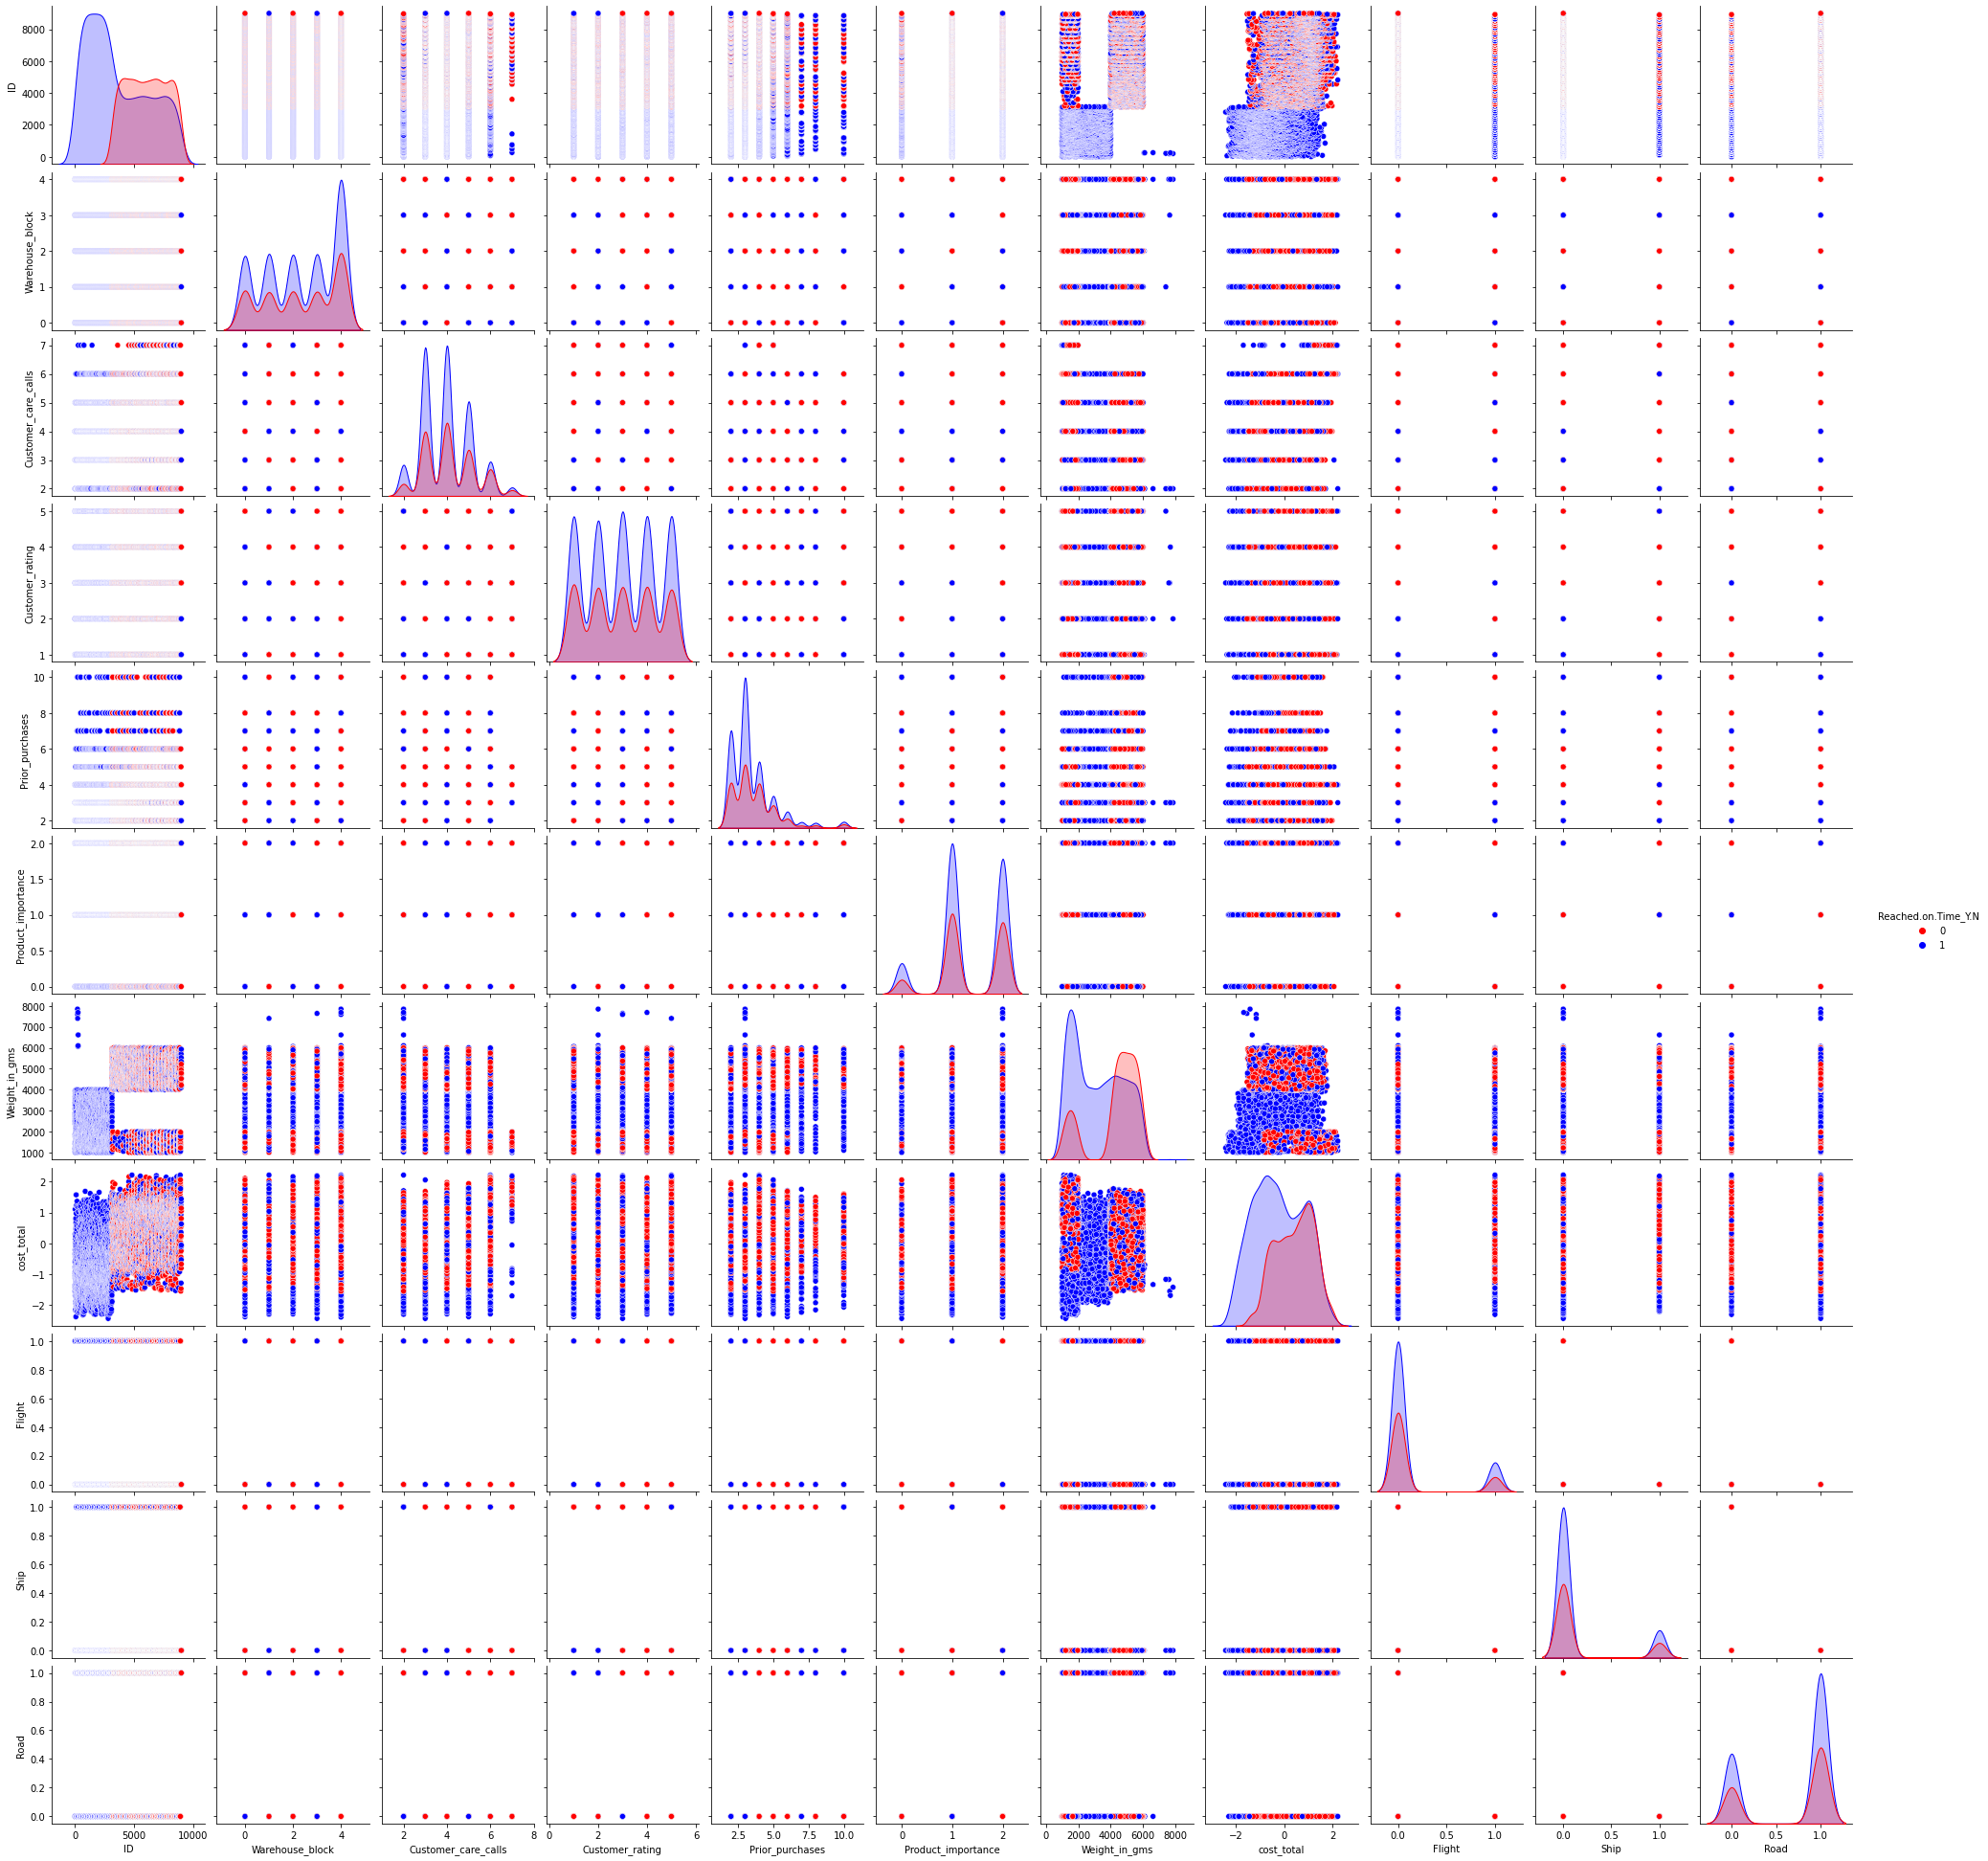

In [261]:
sns.pairplot(data, hue="Reached.on.Time_Y.N", palette = ['r', 'b'])
plt.show()

Podemos observar que no hay dato que divida notablemente la demora del envio, en cost_total y Weigt_in_gms vemos una pequeña division, por lo que seran las variables que utilizaremos para la prediccion 

Trabajamos con el dataset test para normalizar

In [232]:
test = test.assign(cost_total=test.Cost_of_the_Product - test.Discount_offered*test.Cost_of_the_Product/100)
test.drop(columns=['Cost_of_the_Product','Discount_offered'], inplace=True)

In [233]:
data_test = test[['cost_total','Weight_in_gms']]

In [234]:
scaler = StandardScaler()
scaler.fit(data_test[['cost_total']])
data_test['cost_total'] = scaler.transform(data_test[['cost_total']])

C:\Users\santi\AppData\Local\Temp\ipykernel_8572\1416377366.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_test['cost_total'] = scaler.transform(data_test[['cost_total']])


In [243]:
data_test

,cost_total,Weight_in_gms
0,-0.796825,5248
1,-1.556541,4446
2,-0.256432,5739
3,-1.665750,4643
4,1.000717,5504
...,...,...
1995,0.998004,1538
1996,0.288031,1247
1997,0.610006,1155
1998,0.298432,1210


Separamos el dataframe en atributos y etiquetas. x los feature que seran cost_total y Weight_in_gms

In [262]:
X= data[['cost_total', 'Weight_in_gms']]
Y = data['Reached.on.Time_Y.N']

Ahora que tenmos nuestras variables predictores X y nuestra variable a predecir y, vamos a crear un arbol de decicion. 

# Train values: 7199 # Test values 1800
Accuracy en test: 0.684
Recall score en test: 0.7498


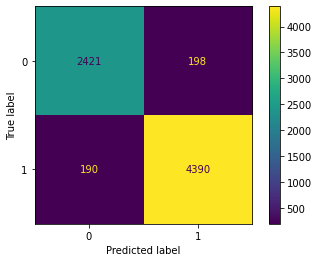

In [288]:
from sklearn.tree import DecisionTreeClassifier

# Instanciamos un objeto de la clase DecisionTreeClassifier


clf = DecisionTreeClassifier(max_depth = 30, random_state = 15) 
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size = 0.20, random_state = 101)
print(f'# Train values: {X_Train.shape[0]} # Test values {X_Test.shape[0]}')
clf.fit(X_Train,Y_Train)
Y_train_pred = clf.predict(X_Train)
Y_test_pred = clf.predict(X_Test)

matrix = confusion_matrix(Y_Train, Y_train_pred)
matrix_d = ConfusionMatrixDisplay(matrix)

print(f'Accuracy en test: {round(accuracy_score(Y_Test, Y_test_pred),3)}')
print(f'Recall score en test: {round(recall_score(Y_Test, Y_test_pred),4)}')

matrix_d.plot()
plt.show()

In [251]:
pred1 = clf.predict(data_test)
prediccion1= pd.DataFrame(pred1)
prediccion1.columns=['pred']
prediccion1.value_counts()

pred
0       1074
1        926
dtype: int64

PREDECIMOS CON OTRO MODELO (KNeighborsClassifier)

In [289]:
X1= data[['cost_total', 'Weight_in_gms']]
Y1 = data['Reached.on.Time_Y.N']

Accuracy en test: 0.681
Recall score en test: 0.7266


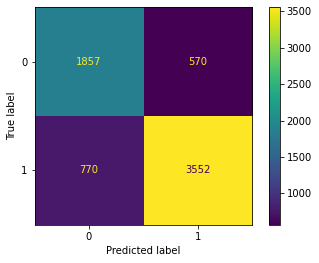

In [292]:
from sklearn.neighbors import KNeighborsClassifier

# Instanciamos un objeto de la clase KNeighborsClassifier

clf = KNeighborsClassifier()
X_Train1, X_Test1, Y_Train1, Y_Test1 = train_test_split(X1, Y1, test_size = 0.25, random_state=50)
clf.fit(X_Train1,Y_Train1)
Y_train_pred1 = clf.predict(X_Train1)
Y_test_pred1 = clf.predict(X_Test1)

matrix = confusion_matrix(Y_Train1, Y_train_pred1)
matrix_d = ConfusionMatrixDisplay(matrix)

print(f'Accuracy en test: {round(accuracy_score(Y_Test1, Y_test_pred1),3)}')
print(f'Recall score en test: {round(recall_score(Y_Test1, Y_test_pred1),4)}')

matrix_d.plot()
plt.show()


RANDOM FOREST

In [308]:
X2= data[['cost_total', 'Weight_in_gms']]
Y2 = data['Reached.on.Time_Y.N']

c:\Python39\lib\site-packages\sklearn\ensemble\_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


Accuracy en test: 0.91
Recall score en test: 0.9272


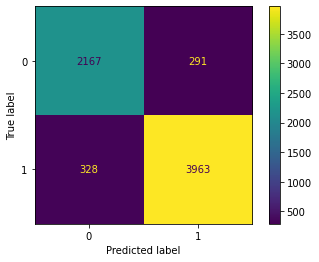

In [312]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=7, max_features='sqrt', n_jobs=-1, oob_score = True, random_state = 24)
X_Train2, X_Test2, Y_Train2, Y_Test2 = train_test_split(X2, Y2, test_size = 0.25, random_state=0)
clf.fit(X_Train1,Y_Train1)
Y_train_pred2 = clf.predict(X_Train2)
Y_test_pred2 = clf.predict(X_Test2)
matrix = confusion_matrix(Y_Train2, Y_train_pred2)
matrix_d = ConfusionMatrixDisplay(matrix)
print(f'Accuracy en test: {round(accuracy_score(Y_Test2, Y_test_pred2),3)}')
print(f'Recall score en test: {round(recall_score(Y_Test2, Y_test_pred2),4)}')

matrix_d.plot()
plt.show()


In [247]:
pred = clf.predict(data_test)
prediccion= pd.DataFrame(pred)
prediccion.columns=['pred']
prediccion.to_csv('SantiGallastegui.csv', index=False)

In [248]:
prediccion.value_counts()

pred
0       1047
1        953
dtype: int64

OTRO MODELO ( LogisticRegression)

In [313]:
X3= data[['cost_total', 'Weight_in_gms']]
Y3 = data['Reached.on.Time_Y.N']

# Train values: 7199 # Test values 1800
Accuracy en test: 0.679
Recall score en test: 0.8018


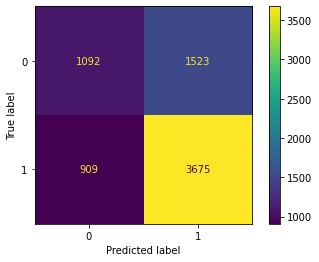

In [314]:

from sklearn.linear_model import LogisticRegression


clf = LogisticRegression()
X_train3, X_test3, Y_train3, Y_test3 = train_test_split(X3, Y3, test_size = 0.2, random_state = 10)
print(f'# Train values: {X_train3.shape[0]} # Test values {X_test3.shape[0]}')
clf.fit(X_train3, Y_train3)
y_train_preds3 = clf.predict(X_train3)
y_test_preds3 = clf.predict(X_test3)

matrix = confusion_matrix(Y_train3, y_train_preds3)
matrix_d = ConfusionMatrixDisplay(matrix)
print(f'Accuracy en test: {round(accuracy_score(Y_test3, y_test_preds3),3)}')
print(f'Recall score en test: {round(recall_score(Y_test3, y_test_preds3),4)}')

matrix_d.plot()
plt.show()